# Support Vector Machine Assignment

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [5]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [6]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRE         400 non-null    int64  
 1   TOEFL       400 non-null    int64  
 2   SchoolRank  400 non-null    int64  
 3   SOP         400 non-null    float64
 4   LOR         400 non-null    float64
 5   GPA         400 non-null    float64
 6   Research    400 non-null    int64  
 7   Admitted    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


### Group the data by the Admitted field and compute the average values for each field.

In [16]:
data['Admitted'].value_counts()

1    247
0    153
Name: Admitted, dtype: int64

In [32]:
admitted = data[data['Admitted'] == 1]
rejected = data[data['Admitted'] == 0]
print(f'Avgs for admitted: \n{admitted.mean()}')
print(f'Avgs for rejected: \n{rejected.mean()}')

Avgs for admitted: 
GRE           322.874494
TOEFL         110.396761
SchoolRank      3.599190
SOP             3.807692
LOR             3.809717
GPA             8.915425
Research        0.732794
Admitted        1.000000
dtype: float64
Avgs for rejected: 
GRE           307.013072
TOEFL         102.588235
SchoolRank      2.261438
SOP             2.741830
LOR             2.875817
GPA             8.087974
Research        0.248366
Admitted        0.000000
dtype: float64


In [35]:
admitted.shape

(247, 8)

In [36]:
rejected.shape

(153, 8)

### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [43]:
applied_total = data.shape[0]
admitted_total = admitted.shape[0]
rejected_total = rejected.shape[0]

print(f'% of students admitted: {admitted_total/applied_total*100:.2f}')
print(f'% of students rejected:{rejected_total/applied_total*100}')

% of students admitted: 61.75
% of students rejected:38.25


### What percent of students with research experience were admitted?

In [56]:
admitted_research = admitted['Research'].value_counts()[1]
print(f'% of students admitted that have a research background is {admitted_research/applied_total*100}')

% of students admitted that have a research background is 45.25


### What percent of students admitted had research experience?

In [57]:
print(f'% of students who were admitted that have research experience is {admitted_research/admitted_total*100:.2f}')

% of students who were admitted that have research experience is 73.28


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

In [71]:
admitted['SOP'].value_counts()

4.0    55
4.5    49
3.5    43
5.0    35
3.0    35
2.5    20
2.0     9
1.5     1
Name: SOP, dtype: int64

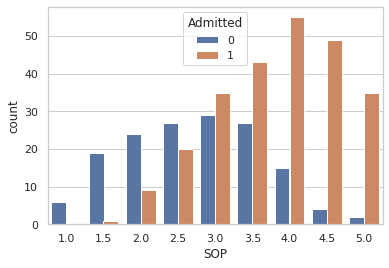

In [76]:
sns.set_theme(style="whitegrid")
SOP_bar = sns.countplot(x='SOP', data=data, hue=data['Admitted'])

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

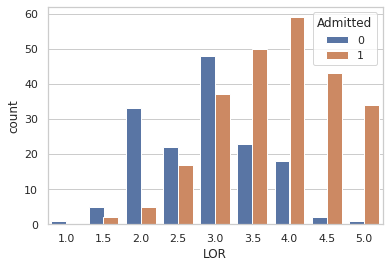

In [84]:
LOR_bar = sns.countplot(x='LOR', data=data, hue='Admitted')

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

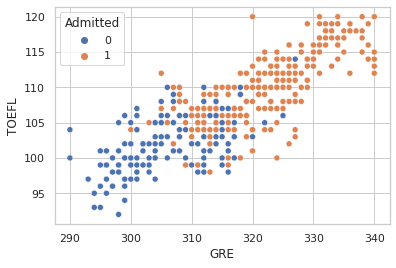

In [82]:
sns.scatterplot(data=data, x='GRE', y='TOEFL', hue='Admitted')
plt.show()

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

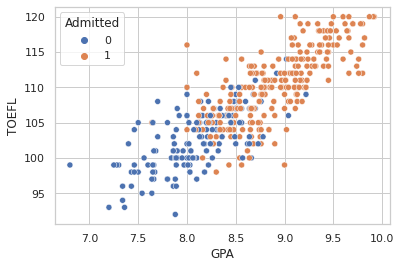

In [83]:
sns.scatterplot(data=data, x='GPA', y='TOEFL', hue='Admitted')
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

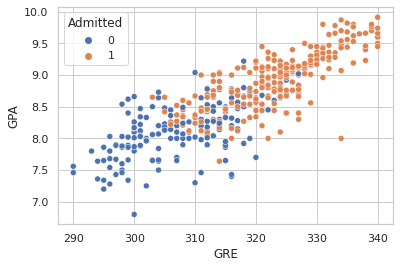

In [85]:
sns.scatterplot(data=data, x='GRE', y='GPA', hue='Admitted')
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [87]:
x = data.drop(columns='Admitted')
y = data['Admitted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [91]:
svm = SVC(kernel = 'linear')
svm_train = svm.fit(x_train, y_train)
svm_test = svm.fit(x_test, y_test)

print(f'Train score: {svm_train.score(x_train, y_train)}')
print(f'Test score: {svm_test.score(x_test, y_test)}')

Train score: 0.84375
Test score: 0.9


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [93]:
print(classification_report(y_train, svm.predict(x_train)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       114
           1       0.90      0.85      0.88       206

    accuracy                           0.84       320
   macro avg       0.83      0.84      0.83       320
weighted avg       0.85      0.84      0.85       320



In [95]:
print(classification_report(y_test, svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        39
           1       0.88      0.93      0.90        41

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

